In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon') #required for Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
now

'04-01-2023'

In [15]:
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')
yesterday

'03-31-2023'

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 100

In [18]:
# save the company name in a variable
company_name = input("Please provide the name of the Company or a Ticker: ")

# As long as the company name is valid, not empty...
if company_name != '':
    print(f'Searching for and analyzing {company_name}, Please be patient, it might take a while...')

    # Extract News with Google News
    googlenews = GoogleNews(start=yesterday, end=now, period=100)
    googlenews.search(company_name)

    # Retrieve the first 30 results
    result = []
    for i in range(10):
        googlenews.getpage(i+1)
        page_result = googlenews.result()
        if page_result:
            result.extend(page_result)

    # Store the results
    if result:
        df = pd.DataFrame(result)
        print(df)
    else:
        print("No news articles found.")

Searching for and analyzing hdfc bank, Please be patient, it might take a while...
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
'NoneType' object is not iterable
                                                 title                 media  \
0    HDFC Bank, BEL to JSW Steel: Anuj Gupta of IIF...                  Mint   
1    Sensex rallies over 1,000 points, Nifty rallie...          Zee Business   
2    Investor wealth jumps Rs 3.7L cr as Sensex sur...        Business Today   
3    From Citibank to setting up HDFC Bank: Behind ...        Business Today   
4    HDFC Bank to held its board meeting on April 1...           PSU Connect   
..                                                 ...                   ...   
500                 Market Edge News-Bajaj Electricals          Moneycontrol   
501  Bank FD: Increased FD interest rates.. Which b...               IG News   
502  iPhone 13 has arrived in the budget! Getting a...      N

In [19]:
try:
    list =[] #creating an empty list
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass
        #storing results in our empty dictionary
        dict['Date']=df['date'][i]
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )

            Date                 Media  \
0    8 hours ago                  Mint   
1      1 day ago          Zee Business   
2      1 day ago        Business Today   
3      1 day ago        Business Today   
4      1 day ago           PSU Connect   
..           ...                   ...   
500    1 day ago          Moneycontrol   
501  2 hours ago               IG News   
502  3 hours ago      News Day Express   
503  0 hours ago         Enter21st.com   
504  3 hours ago  Daily Hindustan News   

                                                 Title  \
0    HDFC Bank, BEL to JSW Steel: Anuj Gupta of IIF...   
1    Sensex rallies over 1,000 points, Nifty rallie...   
2    Investor wealth jumps Rs 3.7L cr as Sensex sur...   
3    From Citibank to setting up HDFC Bank: Behind ...   
4    HDFC Bank to held its board meeting on April 1...   
..                                                 ...   
500                 Market Edge News-Bajaj Electricals   
501  Bank FD: Increased FD inte

Positive Sentiment: 406.00
Neutral Sentiment: 24.00
Negative Sentiment: 75.00


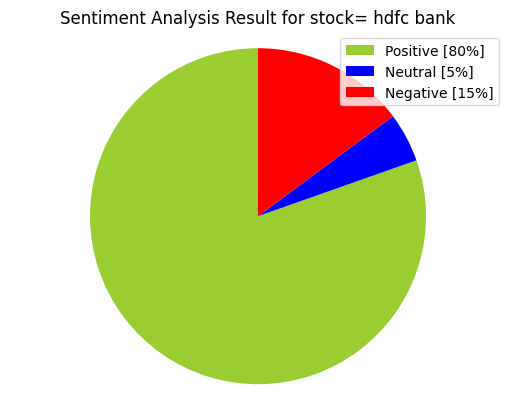

In [20]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+company_name+"" )
plt.axis('equal')
plt.show()


Wordcloud for hdfc bank


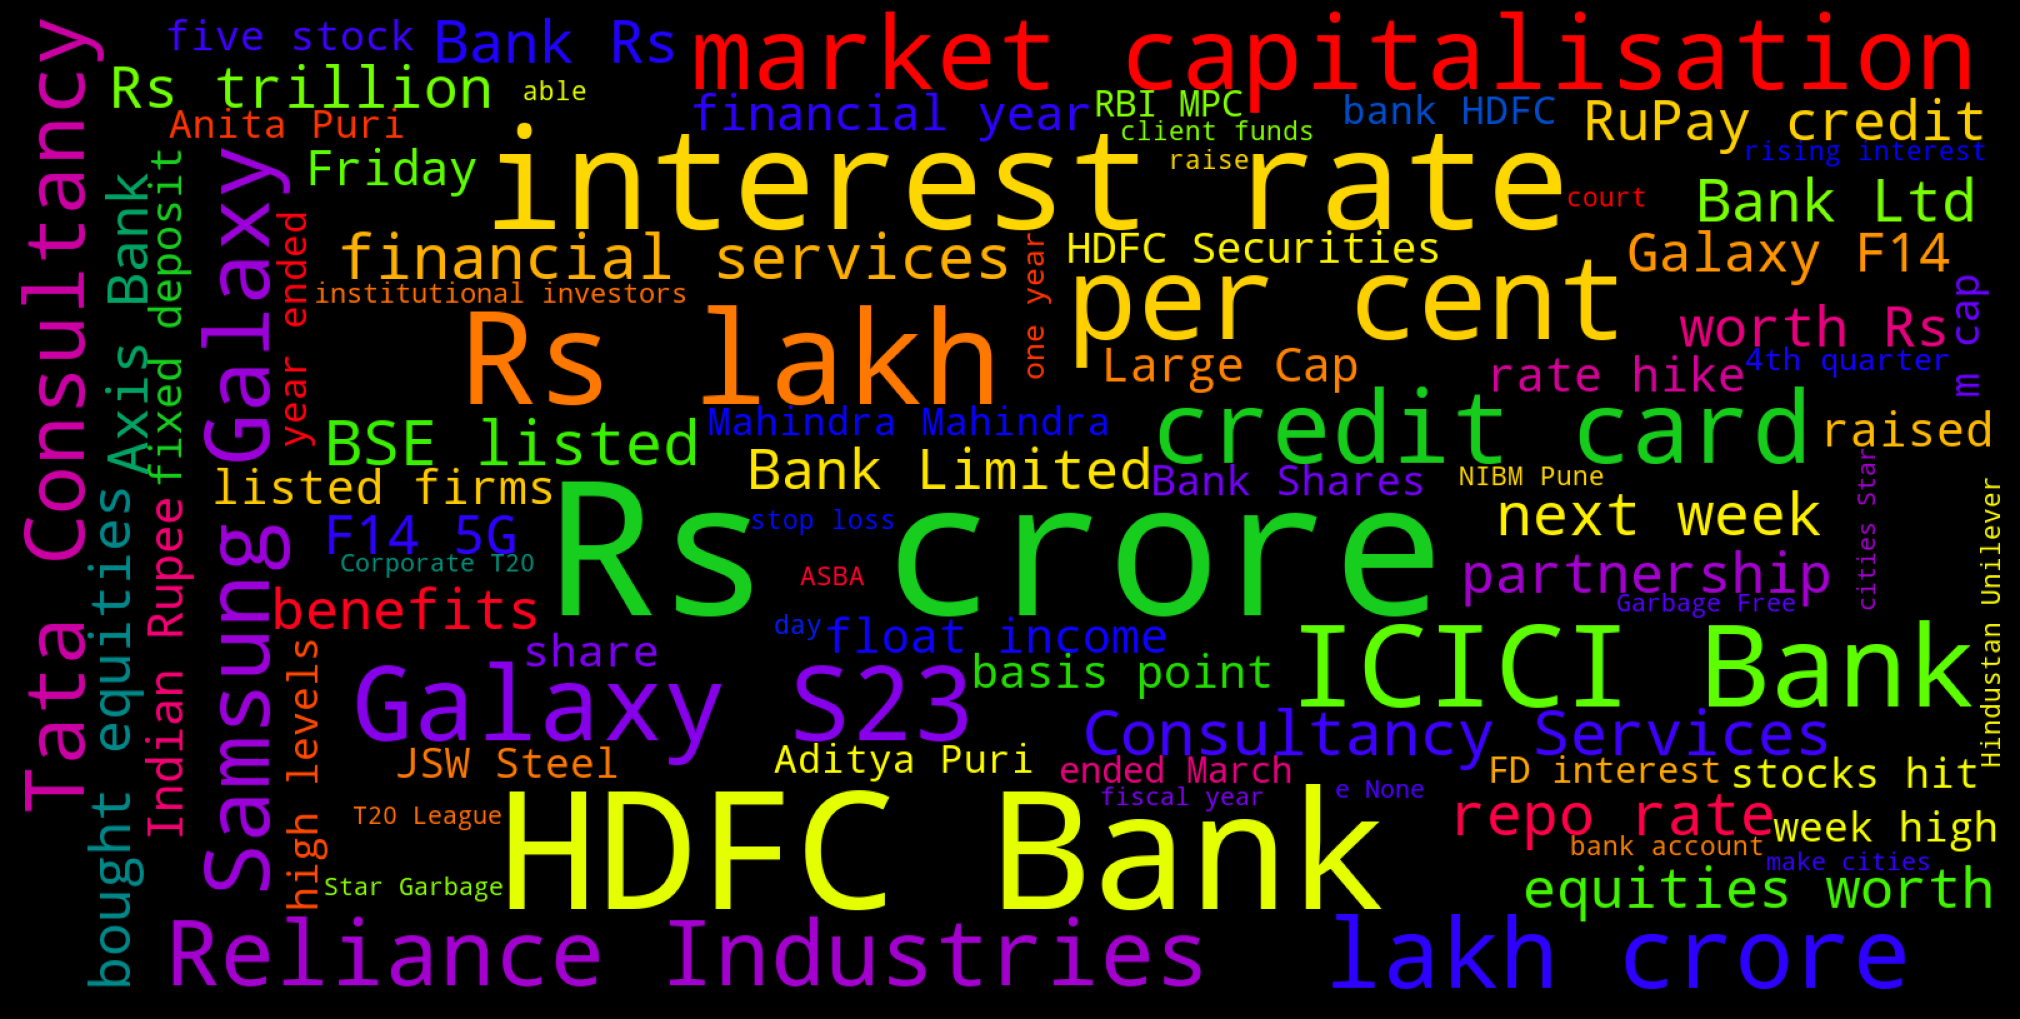

In [21]:
# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + company_name)
word_cloud(news_df['Summary'].values)

In [22]:
df

,title,media,date,datetime,desc,link,img
0,"HDFC Bank, BEL to JSW Steel: Anuj Gupta of IIF...",Mint,8 hours ago,2023-04-01 14:40:15.981062,"HDFC Bank, BEL to JSW Steel: Anuj Gupta of IIF...",https://www.livemint.com/market/stock-market-n...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,"Sensex rallies over 1,000 points, Nifty rallie...",Zee Business,1 day ago,2023-03-31 22:40:15.988061,"Among heavyweights, Reliance, ICICI Bank, Info...",https://www.zeebiz.com/markets/stocks/news-nif...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Investor wealth jumps Rs 3.7L cr as Sensex sur...,Business Today,1 day ago,2023-03-31 22:40:15.999450,"... led by gains in energy, banks, financials ...",https://www.businesstoday.in/markets/market-co...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,From Citibank to setting up HDFC Bank: Behind ...,Business Today,1 day ago,2023-03-31 22:40:16.011450,From Citibank to setting up HDFC Bank: Behind ...,https://www.businesstoday.in/opinion/columns/s...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,HDFC Bank to held its board meeting on April 1...,PSU Connect,1 day ago,2023-03-31 22:40:16.020510,HDFC Bank is the third largest company by mark...,https://www.psuconnect.in/news/hdfc-bank-to-he...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...
500,Market Edge News-Bajaj Electricals,Moneycontrol,1 day ago,2023-03-31 22:40:19.850735,Investors remained cautious as worries over th...,https://www.moneycontrol.com/ntrol.com/news/bu...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
501,Bank FD: Increased FD interest rates.. Which b...,IG News,2 hours ago,2023-04-01 20:40:19.857692,"In this context, major private bankers like IC...",https://irshadgul.com/bank-fd-increased-fd-int...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
502,iPhone 13 has arrived in the budget! Getting a...,News Day Express,3 hours ago,2023-04-01 19:40:19.864691,The same if a discount of Rs 2000 is being giv...,https://www.newsdayexpress.com/tech/iphone-13-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
503,Opportunity to buy iPhone 14 for 40 thousand! ...,Enter21st.com,0 hours ago,2023-04-01 22:40:19.866692,"An instant discount of Rs 4,000 will be given ...",https://enter21st.com/opportunity-to-buy-iphon...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [23]:
results = []

for headline in df['title']:
    pol_score = SentimentIntensityAnalyzer().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)

results

[{'neg': 0.0,
  'neu': 0.814,
  'pos': 0.186,
  'compound': 0.4767,
  'headline': 'HDFC Bank, BEL to JSW Steel: Anuj Gupta of IIFL Securities recommends 5 buy or sell stocks for next week | Mint'},
 {'neg': 0.0,
  'neu': 0.838,
  'pos': 0.162,
  'compound': 0.4019,
  'headline': 'Sensex rallies over 1,000 points, Nifty rallies 279 pts to reclaim 17,350 amid broad-based rally'},
 {'neg': 0.0,
  'neu': 0.862,
  'pos': 0.138,
  'compound': 0.4939,
  'headline': 'Investor wealth jumps Rs 3.7L cr as Sensex surges over 1,000 pts; HLE Glascoat, Brightcom Group, Reliance rise up to 12%'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': "From Citibank to setting up HDFC Bank: Behind Aditya Puri's exceptional banking career"},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': 'HDFC Bank to held its board meeting on April 15 to consider ...'},
 {'neg': 0.0,
  'neu': 0.824,
  'pos': 0.176,
  'compound': 0.4588,
  'headline': 'Bank FD: ICICI Bank 

In [24]:
df.shape

(505, 7)